# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Check for GPU
!nvidia-smi

Tue Jan  6 13:31:25 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

2.9.0+cu126


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [6]:
# autonomous navigation
# manufacturing - quality analysis
# healthcare - monitoring and diagnosis

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [7]:
# overfitting is generally when the training accuracy is more than the test accuracy
# i.e the model fails to predict in real world scenarios
# the model focuses on training very much as even a small noise can cause high sensitivity
# its like by hearting some answers and writing the exam and pass the exam only if the questions are already known else failed
# not suitable for real-world applications

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [8]:
# 1. more training data: increasing the data size with more diverse data or by data augmentation
# 2. early stoping: monitoring validation loss and stop training when the loss is increasing
# 3. cross-validation: splitting data to multiple folds i.e, training and testing in different combinations

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [9]:
# tried uploading many images and notices an error that when i upload image
# of a red panda babyb(data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUTExMVFhUXFxUVFxYWFRcVFRUVFRUWFhUVFRYYHSggGBolGxUWITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGy0gHyUrLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tKy0tLS0tLf/AABEIAQMAwgMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAECBwj/xAA7EAABAwMCAwUGAwcEAwAAAAABAAIRAwQhMUEFElEGYXGBkQciMqGx8BPB0RQVQlJy4fEjM0OSFmKC/8QAGgEAAgMBAQAAAAAAAAAAAAAAAgMBBAUABv/EACcRAAICAQMEAQUBAQAAAAAAAAABAhEDEiExBBNBUTIFFCJhcVKx/9oADAMBAAIRAxEAPwCz3XYW1eZDeXwMJVV9nbgf9Ku4dxJV9bSYdHfNdigdnKvQdnmtXsdft+GqHDvQVXgt+z4qQd4L1sNeOhXReRq1EoojUzx5teuz46Dx5Jrw7tFRaIfLT3ghelFzDq31CgrcLt6gzTYfIKXhTO7rRQzxmi8+69vqpqdyw/xD1VluOxNm/wD4mjwwl9b2aWx+Fz2nueUD6b9k9/8AQvfykahBVbYJhcezmq3/AGrh4HR2UA/srxGno9jx5goft5eCe9EXXFqEvrWwTOvZ3rfjoH/5yl9zWc346b2+LSo7UkEskX5BDRIWxVhdNu2HEqN5adwop+QrCqV1C7/GLkNTamVjQyoJBzTcXDCb2DCpOUAom1iV1nBsGNEHUeZTVpEIUsEqEczi2kohtMyp7UCVPUaFxBDTpDdLO0jP9MADUpuKjQJJVf43xRlRwY3PKcnZHGL5OTV0If2crE5ACxTrY7QeWUO0VzT0qPn+oprae0K9Z/yE+MFKX0Wu8UFXtCNE5aWU3ZfLT2s3Lfiax3kR+ac2vtfH8dH0d+q8hIhalFpRFnu1r7VrR3xNe3yB+icWnbuwqf8AK0f1Dl+q+cpWw5TTI2PqS14vbVPgrMPg8Jgx4OjvoV8mtrOGhKNtuOXFP4K1QeDiPzXbkUj6ra89QuxUPQL5ptfaBf09K7j/AFQfqE5tfa3et+JtN/iI+hXWztKPfC4HVqjqW1J2rR6Lyiw9rrnD36GRqA6PSR9+asdj7RqNQAup1Gj3dgQOYSJhRrSO7bZY7rstaVNabPQJJdeze2cfdBb4FNmdoKO8jJGQRkbSibfi9Fw92q0n+oKdSZGhoptx7NHN/wBuq7zyllTsfe0/hLXeoXqVO5GzlJ+Me4rqizrkvJ41Xtbyn8dBx725UA40WYcxzT3tIXtjnNOrUNW4fQf8TB5gKHjiydc0eTW/aJpxzKccTnQhXW+7C2lbJpgHuwVXOIey+M0az29xMhD2V4J7z8ojoXRJ12RDqx6qrXvZfiNCSCHAbz+Sb8LY8MH4hl26LF0rlL9HSzpIJuHkjJSahS5i49Cm9zoUNZUuVgPUlWeqShBRRHTXKds7AWk0FEdFizbRpUzxt7VyXkJncW24QT6eUdlSgWqwOQj7c7Ji5gUXKjUqBaFpaVgRz25ytfgsOphGpgaQJYFIaBmACekZU9raPJnlOCBkaHae7CKyKBmNkwiLW25nGmQQ6CR4gaequHCew1SsJ+HMjGdYGPvVXngvY2nRdzVAHOgCY1iM9xx97qllSGxxMpvZPsnUqOIqthpALX75lsDxB+S9C4f2YpU4LsuEQToYIwR5BMH1hTwAoql9nXX6j79FVeWywoUNadswt5YxAx36YHggrrgtL4uQTqCBrIOD8/Vc0ruMz96hHftJ0PQH76/4RKQLQv8A3UzlIaXNnliHEEREAZ7o9VW+PVr+1eXU6rnUoByA6Ovef7q13FSAXbj6HGvTI9FJSe14g58ehUqTR2lM86f7SL2i4NfRDyQDEEHJIjG+nqmVt7XGjFSg4f0uBVp4hwGk/PKJdGe+SB9UpodhaJqE/hiI0OAP1ToPUxM0krDuEe0O3uDAbUHiwx6hWYcUaQCJzt/lJGcCFNnKzlb0huUuuqgt6Ti9+RoSeqvYsUX5spznJeCbj/GXuJpiI3jXwSlrcJS3j1vzQazJP/sEzZWa4S0gjuV2CitkId+QXiZPLA1JACOq0OWk0dIXDWiQTsmNSHMKzuvUlJPwaXQ6WmvJ3TpiB4BaUtNmB4BYsw0qPJXFB1qGUY4LITSgKXsUI1TOozBwgHshEmQcPGVDVpIhaIXEF39mlhReXNr0RztMscZEjfI+RGCCvV2cPtxJFNgJ1PKMzmfUn1XmvYpxaGyeZhAh0AlpHU/LuXotpV222QyyUFoDDQpxHKANox/goO4howfv7yt1Kw8EovbwhVcma9h+PGCcUuPv9ErfcEf5+SnrPlAXLz5IEMY44ZUL3AHpPpET6p3bvkYIlo07ohU20uSw9e7uTu0uxz4MYcAdzqYnrsmxYMkPQ5pb3EDTruPvooyOUYG+PDbx0KXi4gN2BII3jJkfJFMrSI6iPmibB0jO1rgwSjqb5++9V0FzTGwgeespla15UwyaXQM4WrCrmrjyXmvb6xfWZDTPvSQTr0x0XotUz9fyAVd43TG5xs0fmVpdLK5UUs0djyO17JOdJqe70CZcCuf2ImlUPuk4JMgd3crRXagbjhrKkFw0Wqsaq0UtRJc9p7durvQSjuFcdZVBLJj/ANhH1QtThzHQBTaXGAMbnARvEuwj2U3OdXgt1Y3AE7BLy18ZeQ8ba/KIX+8D/OFiqn/jI/nf6rF328P8on7jJ/piI1mkLYKSt4nTOh9UTTuuhWM8a8F1SD3IWszCwXR3U7HNd3IdDQVi6IXdBg5hOBKM/ZQ7QonhvDKvN7seZHynCh7BLcuHY20bTBZzcwdmeh0lXagwNEZ8JVZ4XbvaGy2CMSMA+X6Jy+s6B19fRVJz8D1EJqvlKbhklMabebu/X8l27h0icFI0PkYpJFfrCAo2WspzU4ccj8llpb8pgjGnn1CmNktoqd/T/Ddyn78O5FWVxHKTrjPTXX72Una6gOZpHQz3FIrWnzGO8D/6OibwCty7WbxWDgNf009ZTBtENI+f+En7KU+UPJ1AGDrB3Tk0nOyPIRnPgjrYG96OLpnu6nME+ABU/DnE5OBtspqVm5+ugx6f5RTaYZsPHed1yhZzmlsENpyEn4/aFwmcDKbUKxP3AW6hDsY/yrWHJodlacdSPO7lkLmm3CbcYpAOdEgeOu/olrW4W/jnqjZl5I6XRJRxnpoenej+IcVq1gGvcCB0ABPj1QLdFslE4rloG3wcLFpYusg8H/BWMa4aEroPK6FRYppEtO8qjefFFs4s4at9ECKq3+IFBI3tuMCcgq09mKhqVBymI8x4O/VUAVGqz9jr8MqD3oBxjX1S8nAcOT18GBpnyhbY8OjP3ugW3ALQebm0z9hQu4qGEYEdY+qzfJcLAwabHbw6HqFyeMNaIOqDbfNeMEZ6Ku8SqFr4J/v4dVO5ySLdbXweCJ6wvPh2ku6N0WV5c0vLQ3lPwZ94OnbGInporFwy2LoLHbyN8d+cKwDhLH5qNDiNyEWKSjs1ZE16Yip2hrOl2WxjrB/PCY/+PYGNDiBtsD8k2ZQa3QaYjomVnUaN9fv8kcMepkTnS2Kxf2D6THVAHEtBlrRl0mcddVWuxHHruveFtRrxQMnLCyBGBByTzRkHZeuFjY0nbKX3do0A8oDHH+INGY2T9OhexLnrYHWvgx0bKU3TXiBH6dUkvqIaDMvPQaz+SBtKrmwDEnYEHXTRITktxzjFluoCe/fGkbLmnqZgx3iPnp0Qtm/3CSQB1J3UdoZzzAica4TluKaoF7R0mxzb58PXcquMGIhN+NXvM6ION4CWLe6VPRuZedrVsdQo3rqVw4qwxBJCxR86xRZJ5dadgbh/8QRzfZpV3qBep8ffSoV4bgOEx0KDsuJU6ocGuBIK8lkz5YujehhxtHnzPZm7eqiR7L+tUq9tqrd1ehjS5xgAJf3OV+RnYx+jzu89n9Ok0udWiBulHBez5cecv5Gg4cdwFaXPdfVJJii0/wDb+yM44wBoa0Q0Jyyz+LYDxR5SNULkhgAfzQNdPX12WnV5I1kGMaH9VWqlYs0JU1pxSDBgCImJypeMHUWmldkYcCc4IEEDvjXTUhHcSptqMDhtse7oqr+3dHg6YzjvwJR3DOJ6twTnT6Z0UUSW7s04EcojridesK0ueGASqbwiu5rgcDx28Neuys13U5gI+RUpAsWdsePi0py2CXwGid9yqDS7S3nOCanLMODQBEHvKb9ubM12NOj2c0bTMeU4XndRlRrg0tdzHAxrAnEaqziSoXOz6D7N9pKVwxoDwTytnIBL4PMOXXESntdgqDBzHqvDexFg6nWFYyCAQ0HQFwguPlPqvW+G8REST9/YRtpsDS0rEnaQOa2IjbmnPpuknCA4HmcJH9IgeiL7SXja1QsY4EjaS3IOQCDB8CNfNAfvUUmaw/AaCW8zv6SI5gYMQZSXHcansG8S48eb8IcoH8UGXegT2wuBydeuNvBUG2rh7i90c0ycAePT0z5Ir99u+DmEaYGSNESW5D3Q1vqs1SdZ0zoOiyUHT/mKmFULcwSTiZeWLUiQqKocrA9c1HJrYqjcLFFzrEOomivXNy+q7me6T+SAY80qh/DxOveSp6L8IS4qgEkry74N5ch7+LPaOYu0SmtfVbo5JFMfNChrq7ujB800p0wMDQIaUf6Fbl/AilWc1sNMDuUFa5eW5JKI/CMIKuDnP6IoVZE+Bc7OSoailquUMzorKRXZhuSMR6aI61uuTJcZ7hpP0QBIGuqhOuSpcbOui42/FyM80gdNzsNfNWbg91+I3/dLXukidDpH2F5xbwQM+nX7KZ0eKOpCG5JgDOnmErT6DsuF3b3DhDy6RMmBH59UlHAwXh5DiY1LicHXXC7tO2BAAcdMHvP6R9ELedpahIPOBroM7Ik2glQ2pcHccNlg0w4gfeV1e1BSoxzkv11OgkR/1+iT1u10tLebI/NJKnFC9xzI7/vRErYLaDhdNBLg7HfqOh7/AL8Vxd8bEFtUcxnUEiZ3c3c41AB70rqPDZz1iTPkgqbQ/Mx4/kiigGyxW/GjoweToJjQJrYwcnBOsD1CrdoxrDOqa0qz3YjwP3qioiyxsqB2AC0dDvHUKYO6pdaNLRJ+f6Imm6RPUxG6tdPk0umIzQtWgg1AoTUlRytFyuarKlHfMsUXMsXHUV99SGycJWKbq7sYYPmt+9cODRho1PVO7egGCAF5xuv6bSVkTLcMbA2XNLVGhqCqHlcEsYFvfhLLl2DKZtZKhrW+IIn6ooOmDJWivP2WMapzSh3eNl3UZCuJlZi6pqoSUTcoSoUSBZK2sRochSUq8eP0woqdMuOBK21mcqaItkxbzboG4eRv/gpvRs2vwd0VU7JUyJBcJ7zhXcXRzyRuIqeZRe5UZKlZcGEyvuCOo97ev6oNrAkZMcoOpIKMk1aNUqhODkZ128FPbDlK6pMAErmo7ZAEGsr74CZWvECImNIkCEh/ExgBE2znHv8ADZQdZZbW9qVIAHp0TO2J3GOhOnkkfDnkZnPqnNJ89+/iuXJPgLcYwuCVySJXMrQT2KTW51zLFFKxFYIr4fSDRA0CJFQSg6daGrmi6TK82zcQzJURoyZXLKqnnCEI04wspuHMJ6oeo6V3buyFxxx2htw2pjpKWuOEw7W3HK6kdnYPolztJVrG/wAStP5AVcDoY6f3QtSjKNqP22UIA0TUxbIKZ5JjVT21EOzutmkoqNcsMcs52MFWMMdUqAnsiy2lhof4Toeh6FWGlRxCrljxWB7zXjv5SR8kyo8apHR7fVehwRUVsUJu2E3do1wIImUiuOzzMlPqV2H6Ge8ZjzXbqfN3BOlijP5IBSa4KFeWD2uIAJCV12EEh2F6e+2AGiqfH7JsE7rM6joopOUSxDNezEFFh5QeqLtmZlZTpwAOiKtwQRiR03WO2WkhpZN3wnlBvMOnjsEusnMdge6dj+Uqw/sbzQLhEwcEa408eiPHCU3UTpSUVbFzi2fdWFpKVWV3Bz1yCnNvVDh0To5GthMoJ7gxCxEml4+ixO7iA0FaZoirFmqEolMrVkBeeka6NVGrrnxC6qBRtYZUBHMKS3ZBXQYiaFLEqGyaAO0lsLhrACWlpn+yV1WckNhWY0tEBx2zgAyPDdNxZN6FZIeSu1CFulQxK02n+qLps6mFcKxjaOM6ffyXNe3DTIH5ppa8unz+/Jd3tEckjKbhdTTBmriS8KuARB+aai0ac8rP+oKrNq/lKsljXBAXp8GS1TM2caZO2iPH6eikDVK0hZUTmLA7h2Pv5dVWeN4HeTCsdwVVuNVZdHRUuunoxMdhVyF7GeqmY5w0MIZtVSNqarzhoDOzMkTO0d/cr/wZ3ucgmW/mqj2UtS54cTjvVj4K4itVZ3n5Fav03HblIqdZL8aEfauxDX/jtGCYqAbO2d4FD2VcePerff0W8z2vALXsMjZUuhQDCWnVpIIXdfgUJKa4f/QemyalT8DP8bvKxAi/b0+ixZ9loVW6a0tEqtdEyplZLNBEzQui3K5p6ok090DYRG1qMtKeCh2BHWrcFC2Eia3ozCj7Q2PNSMRIg5wjrBqj4/UAp8s5P0XQvUjpcM88fbx+ff4LZBiMppxAtDQ2feJ9BC7p28NxAGMzlaa4KLQLYtc4wBj0R0EjlI0mfDwUzLcsZzDO469cfL1RrbcOAc3Ixp0kZPzREFKq8MfTqEh7g2cD9AZVl4WwwJcm3HrWmaMgwWw71wAVXrK4jdbfRZbW5Szwplop471lZ6Ft7gEaqSofX6LUsq0Q1j5qn8XqEFzpzMeKtzz/AHKqnH6c1e6AY0hZf1JNwT8Frp6ti0OXdEaBQPfJgJvw6iwySRAjxHesYtlt7KUPcL/5RJ8N/kmVqR+1OjcT9ELwOtIfSZkchOfDHmgaNyZc4GDIbPh/hbf0qX4SRS6yO6HvGDr3Nd84VF4qxzXio3QgB3cRoVcuKV+aiHTq0eu/zVfwQQd1dzwjkx6GVsLcXYDyO3AnyWKB9rk66rSyPspf6L3eXoH4eZhOLcJVw+nATy1bAlebkasQhrF0XQhjVypKwMYSxhO1wOiNt9El4dVPPBT5jYKiWxKDbAYSbtDzfiT/AAtbPd4lH2tch/LGExrsaWkEDOq6EtLsiUdSo8sfzFxe4GDIbOp6kIypeRSCZdprX/VDgDHKAANAlVxZF4cxo+FpcfIStKE01ZTlFp0M+EXh5eU5LtSdtCY8gmnAM8w5jyyYgnM6D5lJ+E0DynqIB68pnP31Trh9rylzgIaCDOwnB8pTVvsgBRx7iJ5zSa0hoDfMgZk+KWUxGd/vRMOMHnqFxHQegygYWzihogkUpyuTD7O4hMW15CS0Sj6eitwm6FNBD6iBv7drwZHvbHopXFRPchyJTjplwTFtO0VOtaOY44UljzGR9wrE584IEDOm6j90D4RvnxWVLpJJ7FpZo+Qngd82mS08xcW46eZ9FtlYhoHUlx80usJc4uHgPAIuqclaGGCxRpFecnN7hIr4IUTKygboVjAmPIwFEK51tRwsUaydIHZtye4lNqTsJdzBrnA9UTSumxErxskzci0TsGUZbt6oWg1F0NUtjCS1otDphHz7yHaRqu21BzaoGEg+0AkldXFXZC2NXXxUz3SQhbCJX2zC0c4381E2zY3mdA96cdx2U107AC4uNF2t1RGlcg1HhrA2d9B4RupatGGcuYxvrGinb8IW6owi707TT4I7ca4KveWxGyUVaJnCuZogtJKQ37WiYmVv9P8AUpONZFf7MzL0qT/EXUrcotrYQdMlpyZlMaVk6ocOIHd+avx6/F5srvp5kLlBUEphe2LqeCQfBLHVo2TX1WKuRfbkYWJfdPLjyMy4/IdSiakuwSQO7C7oMbTENbHU7ru9DmyNLJbWiGAAbCFp7Vn44Xba7eolEsilwztLOfw8LbW5UoeCs8F1nHEFYiBbP6LEHch7C7cvQDxihDikow5WvjVHKq9cQ5ecRoMtVk2QPBEgQCoOFH3Ae5GUWTKr0WE9iucfuHhzQCQEtF48H4im3aanBae9IinwSaEybsJ/eNUaOKl4dxWqXZcgXDC6shDgjcI1wBrd8loZf1DJ5lDa8VqukF26iDsFQ8N1KVCEfQyc37HQ4hUxlTnib9ELSZIWRlF24+hfcn7G/D7kuBCX3lHUlH8OovBy2AQgL9h5snE6KYquArvkWXFKRhPuAM5aZLkuoNBd3H5FOn8rKAG8/JNitToGTpCriL5kpGG5Tu6GErZTyrekq3ZLQoKSrSCJt2YXNdqbWwF7it9NQVKAOd0fUYoXtURk4u0S9wWnTjcrqpUO2FJC3yJjyyZFIg/aX/zFYp/wliCibY84lTlVHiLIKvF61VHjLIMrJiXmO+DZpNTGjulvZ8zTCPD4JCS+Rq4EfacYb4quyrN2o+AeKqXNLk/HwKnyFwt23xLhzoCjoVMpr4FeR9Syo7J8PcFJbVIb4oM1uWoUmHI2XA7p1sppwqgXODoMApBZVedwaBJKt9k+pR5W/hujfCMCgq6vWc/IAdOiR8TaRMqwX/LUzIYe9IOJNyM83eNFz5CXBHY0PhO6c8TpYaOowlfD3wYIQ/H7l1K4YSZaduidilUkwJq40S1WYS3lynbwDkaHKFqWm6vyjuUlI4titVxhdtokLVQyurajvIE8KB7Ua5ihe1DpCsDLF21q7hbClI6znlWLuViKiB7eqq8YGFixYyNBjLsz/t+aauYOdYsSZcsbHgS9rR/pFU0LSxWMXxE5OQh+ijp6hYsTRRY7MYSvifxrFiRD5DpcDrsgPfndXuncu6rFiYuQGKeM0w94Ds5G5H0Ul5SDWgAQMLFihkxB6TRrvKWdt9afgsWKUSgzhLiaLZyjRotrFrw+K/hmz+TBxoUO4LFig5HDkO9YsXEoHcoyVtYuJOJWLFiI4//Z)
# it shows high probability to espresso than red panda

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [10]:
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# importing the dataset
from torchvision.datasets import MNIST

# loading train and test dataset
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# test data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [11]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

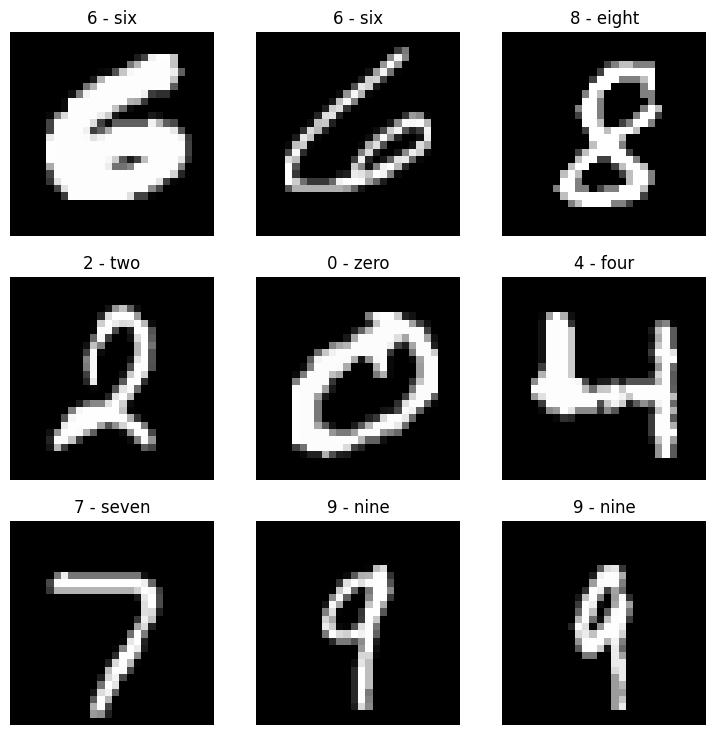

In [12]:
# atleast 5 random samples
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data import DataLoader

# batch size setup
BATCH_SIZE = 32

# turning datasets to iterables
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
# creating a CNN

class MNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

torch.manual_seed(42)
model_2 = MNISTModelV0(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 3 epochs and see how much time it takes on GPU.

In [15]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [17]:
# Setup loss and optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [18]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model_2(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X,y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model_2(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.33344 | Test loss: 0.07280, Test acc: 97.65%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.08343 | Test loss: 0.06539, Test acc: 97.99%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.06563 | Test loss: 0.05568, Test acc: 98.12%

Train time on cuda:0: 34.990 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [19]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [20]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [21]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.7896e-10, 5.6024e-07, 9.9999e-01, 4.3850e-07, 2.8017e-13, 5.8674e-15,
         1.6187e-13, 1.7093e-08, 6.7865e-06, 3.3774e-10],
        [1.3159e-07, 9.8971e-01, 2.5306e-06, 3.7666e-07, 2.0101e-05, 7.1856e-03,
         1.2386e-03, 2.3615e-06, 1.7908e-03, 4.5381e-05]])

In [22]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.7896e-10, 5.6024e-07, 9.9999e-01, 4.3850e-07, 2.8017e-13, 5.8674e-15,
         1.6187e-13, 1.7093e-08, 6.7865e-06, 3.3774e-10],
        [1.3159e-07, 9.8971e-01, 2.5306e-06, 3.7666e-07, 2.0101e-05, 7.1856e-03,
         1.2386e-03, 2.3615e-06, 1.7908e-03, 4.5381e-05]])

In [23]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [24]:
test_labels, pred_classes

([2, 1, 2, 4, 6, 6, 4, 9, 1], tensor([2, 1, 2, 4, 6, 6, 4, 9, 1]))

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [26]:
!pip install "numpy<2.0"


In [27]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.24.0


In [28]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.24.0


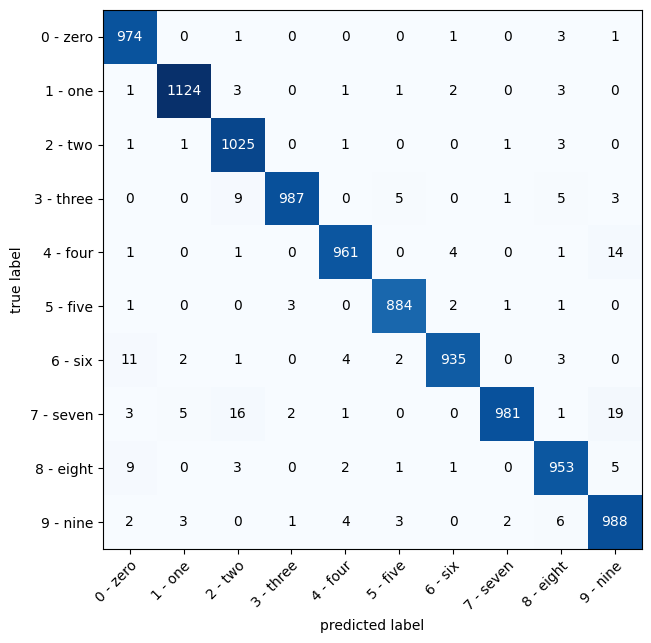

In [29]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [31]:
random_tensor = torch.rand(1, 3, 64, 64)
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [36]:
conv = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=1
)
x = conv(random_tensor)
print("Output size of k = 3, s=1, p=1:", x.shape)

# stride = 2 i.e, downsampling
conv = nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1)
x = conv(random_tensor)
print("----stride=2-------")
print("Output size of k = 3, s=2, p=1:", x.shape)

#zero padding
conv = nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=0)
x = conv(random_tensor)
print("----zero padding-------")
print("Output size of k = 3, s=2, p=0:", x.shape)

# larger kernel
conv = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=1)
x = conv(random_tensor)
print("----larger kernel-------")
print("Output size of k = 5, s=1, p=1:", x.shape)

Output size of k = 3, s=1, p=1: torch.Size([1, 10, 64, 64])
----stride=2-------
Output size of k = 3, s=2, p=1: torch.Size([1, 16, 32, 32])
----zero padding-------
Output size of k = 3, s=2, p=0: torch.Size([1, 16, 31, 31])
----larger kernel-------
Output size of k = 5, s=1, p=1: torch.Size([1, 16, 62, 62])
